**IMPORTS AND LOADING THE DATA**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import os

2024-03-13 17:20:15.311784: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 17:20:15.311854: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 17:20:15.313885: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-13 17:20:15.328138: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-13 17:20:17.623093: W tensorflow/compiler/tf2

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

In [4]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
X_train = X_train/255
X_test = X_test/255

Text(0.5, 0, 'automobile')

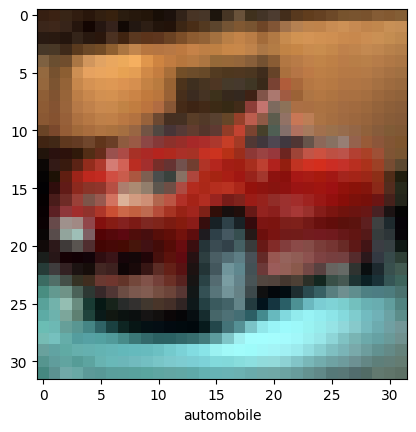

In [8]:
plt.imshow(X_train[45],cmap=plt.cm.binary)
plt.xlabel(class_names[y_train[45][0]])

**BUILDING THE CONVOLUTIONAL BASE**

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))

2024-03-13 17:20:23.719427: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         147584    
                                                                 
Total params: 223232 (872.00 KB)
Trainable params: 22323

**BUILDING AND TRAINING THE CNN**

In [11]:
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         147584    
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [13]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [14]:
model.fit(X_train,y_train,epochs=20)
keras.backend.clear_session()

2024-03-13 17:20:25.658999: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/20


/home/apooyadv/.local/lib/python3.10/site-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1563/1563 [==============================] - 163s 103ms/step - loss: 1.4435 - accuracy: 0.4741
Epoch 2/20
1563/1563 [==============================] - 143s 92ms/step - loss: 1.0297 - accuracy: 0.6389
Epoch 3/20
1563/1563 [==============================] - 145s 93ms/step - loss: 0.8651 - accuracy: 0.6981
Epoch 4/20
1563/1563 [==============================] - 157s 101ms/step - loss: 0.7637 - accuracy: 0.7331
Epoch 5/20
1563/1563 [==============================] - 154s 99ms/step - loss: 0.6849 - accuracy: 0.7595
Epoch 6/20
1563/1563 [==============================] - 152s 97ms/step - loss: 0.6103 - accuracy: 0.7857
Epoch 7/20
1563/1563 [==============================] - 147s 94ms/step - loss: 0.5487 - accuracy: 0.8067
Epoch 8/20
1563/1563 [==============================] - 156s 100ms/step - loss: 0.4892 - accuracy: 0.8259
Epoch 9/20
1563/1563 [==============================] - 153s 98ms/step - loss: 0.4327 - accuracy: 0.8461
Epoch 10/20
1563/1563 [==============================] - 150s 9

**EVALUATING**

In [15]:
model.evaluate(X_test, y_test)[1]

313/313 [==============================] - 10s 30ms/step - loss: 1.7393 - accuracy: 0.7090


0.7089999914169312